# UNC System Salaries Analysis

#### In this project, I will attempt to use Python to analyze real salaries for employees within the UNC System. All of this data, is publicly accessible here: https://uncdm.northcarolina.edu/salaries/index.php.

#### In this project, I will use all 16 institutions within the UNC system (ASU, ECU, ECSU, FSU, NCA&T, NCCU, NCSU, UNCA, UNC-CH, UNCC, UNCP, UNCW, UNCSA, WCU, WSSU). The only 2 institutions excluded in this dataset are UNC-System-Office since it is an administrative office and NCSSM since it is not considered an official college/university.

## Task 1: Imports, Setup, and Data Summary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from  matplotlib.ticker import FuncFormatter
from datetime import datetime

In [3]:
salaries = pd.read_excel('UNC System Salaries.xlsx')
salaries.head()

,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
0,ASU,Abrams,Katherine,J,43,"DEC 01, 2004",Lecturer,41400.0,English,Lecturer
1,ASU,Absher,Dianne,S,61,"MAY 23, 2005",Food Prep Worker,35360.0,Rivers Street Cafe,Food Service Technician
2,ASU,Abu-Elzait,Sohad,NaN,43,"AUG 01, 2021",Assistant Professor,70380.0,Sustainable Technlgy & Built Envirn,Assistant Professor
3,ASU,Acikgoz,Yalcin,NaN,39,"AUG 26, 2011",Associate Professor,79784.0,Psychology,Associate Professor
4,ASU,Adams,Debbie,S,57,"JUL 31, 2001",Nursing Professional,58603.0,Health Services,Professional Nurse


In [4]:
salaries.describe()

,AGE,EMPLOYEE ANNUAL BASE SALARY
count,47661.000000,4.766100e+04
mean,46.180357,8.269779e+04
std,12.350174,6.043273e+04
min,18.000000,9.100000e+02
25%,37.000000,4.831100e+04
50%,46.000000,6.675800e+04
75%,56.000000,9.432300e+04
max,93.000000,2.524390e+06


In [5]:
salaries.rename(columns={'INSTITUTION NAME':'Institution','LAST NAME':'Last Name','FIRST NAME':'First Name','JOB CATEGORY':'Category',
                  'EMPLOYEE ANNUAL BASE SALARY':'Salary','EMPLOYEE HOME DEPARTMENT':'Department',
                  'PRIMARY WORKING TITLE':'Job Title','AGE':'Age'}, inplace=True)

salaries['Hire Year'] = pd.to_datetime(salaries['INITIAL HIRE DATE']).dt.year

current_year = datetime.now().year
salaries['Employment Length'] = current_year - salaries['Hire Year']

salaries.head()

,Institution,Last Name,First Name,INIT,Age,INITIAL HIRE DATE,Category,Salary,Department,Job Title,Hire Year,Employment Length
0,ASU,Abrams,Katherine,J,43,"DEC 01, 2004",Lecturer,41400.0,English,Lecturer,2004,19
1,ASU,Absher,Dianne,S,61,"MAY 23, 2005",Food Prep Worker,35360.0,Rivers Street Cafe,Food Service Technician,2005,18
2,ASU,Abu-Elzait,Sohad,NaN,43,"AUG 01, 2021",Assistant Professor,70380.0,Sustainable Technlgy & Built Envirn,Assistant Professor,2021,2
3,ASU,Acikgoz,Yalcin,NaN,39,"AUG 26, 2011",Associate Professor,79784.0,Psychology,Associate Professor,2011,12
4,ASU,Adams,Debbie,S,57,"JUL 31, 2001",Nursing Professional,58603.0,Health Services,Professional Nurse,2001,22


### Distribution of Overall Data

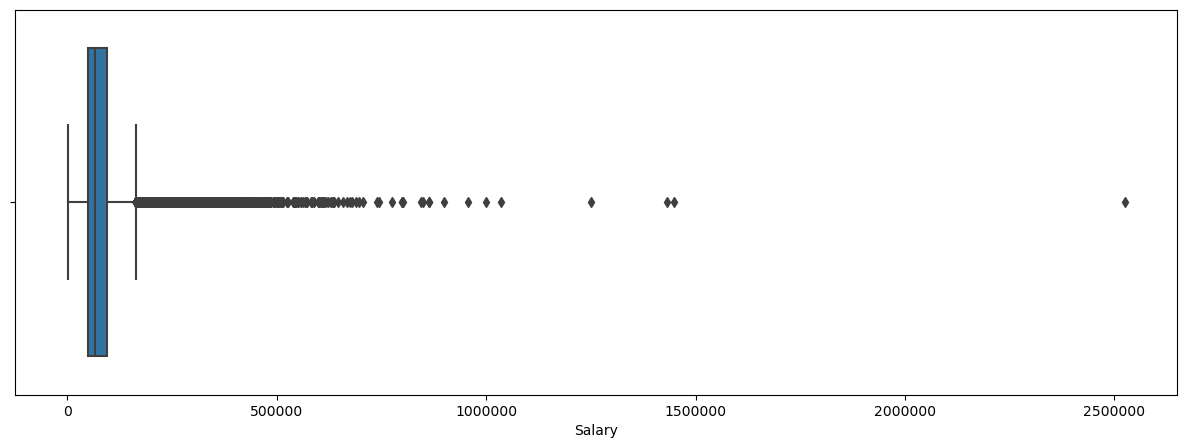

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',data=salaries)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

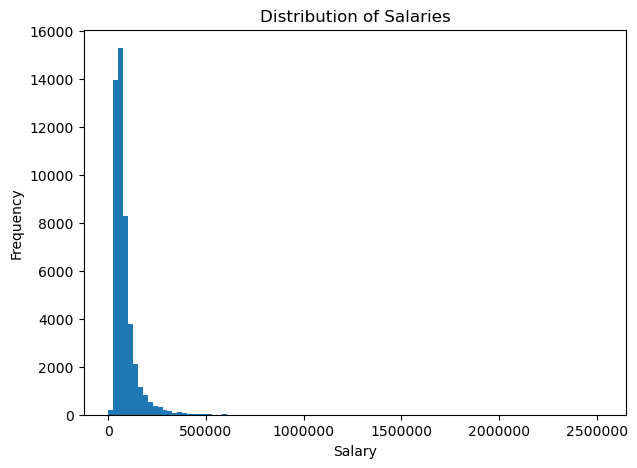

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.hist(salaries['Salary'], bins=100)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Task 2: Break Down Data by Institution, Department, and Job Title

### Salary by Institution

<AxesSubplot:xlabel='Institution', ylabel='Salary'>

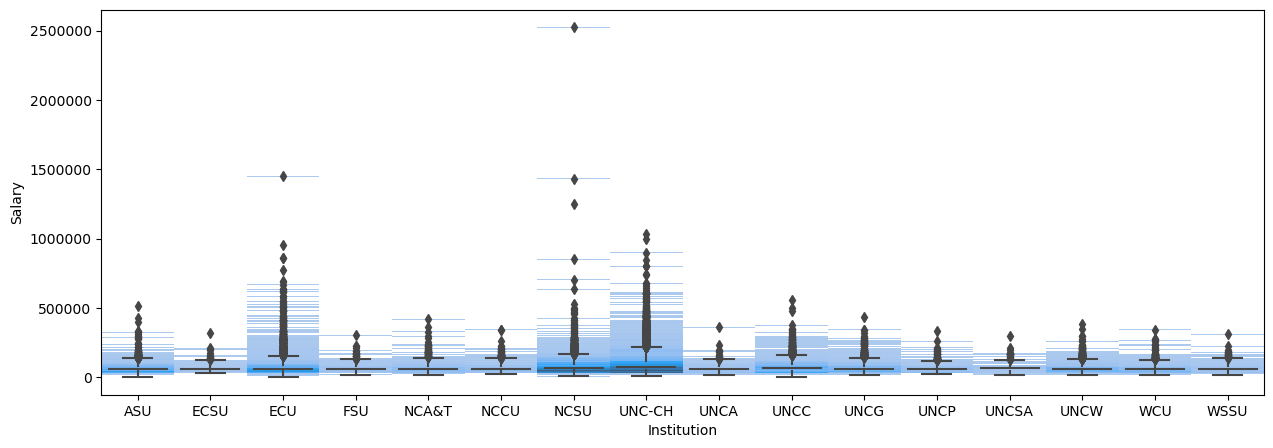

In [7]:
plt.figure(figsize=(15,5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.histplot(x='Institution',y='Salary',data=salaries)
sns.boxplot(x='Institution',y='Salary',data=salaries)

### Salary By Age

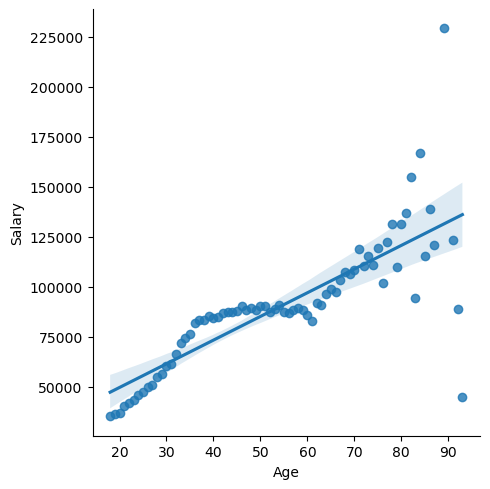

In [8]:
age_salary = salaries.groupby('Age')['Salary'].mean().reset_index()

sns.lmplot(x='Age',y='Salary',data=age_salary)

### Salary By Employment Length

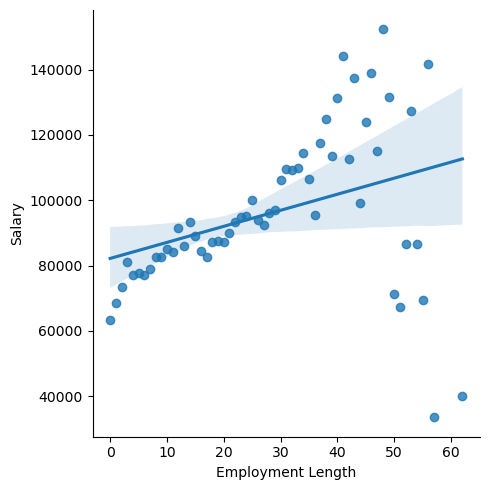

In [78]:
empl_len_salary = salaries.groupby('Employment Length')['Salary'].mean().reset_index()

sns.lmplot(x='Employment Length',y='Salary',data=empl_len_salary)

### Salary By Job Category

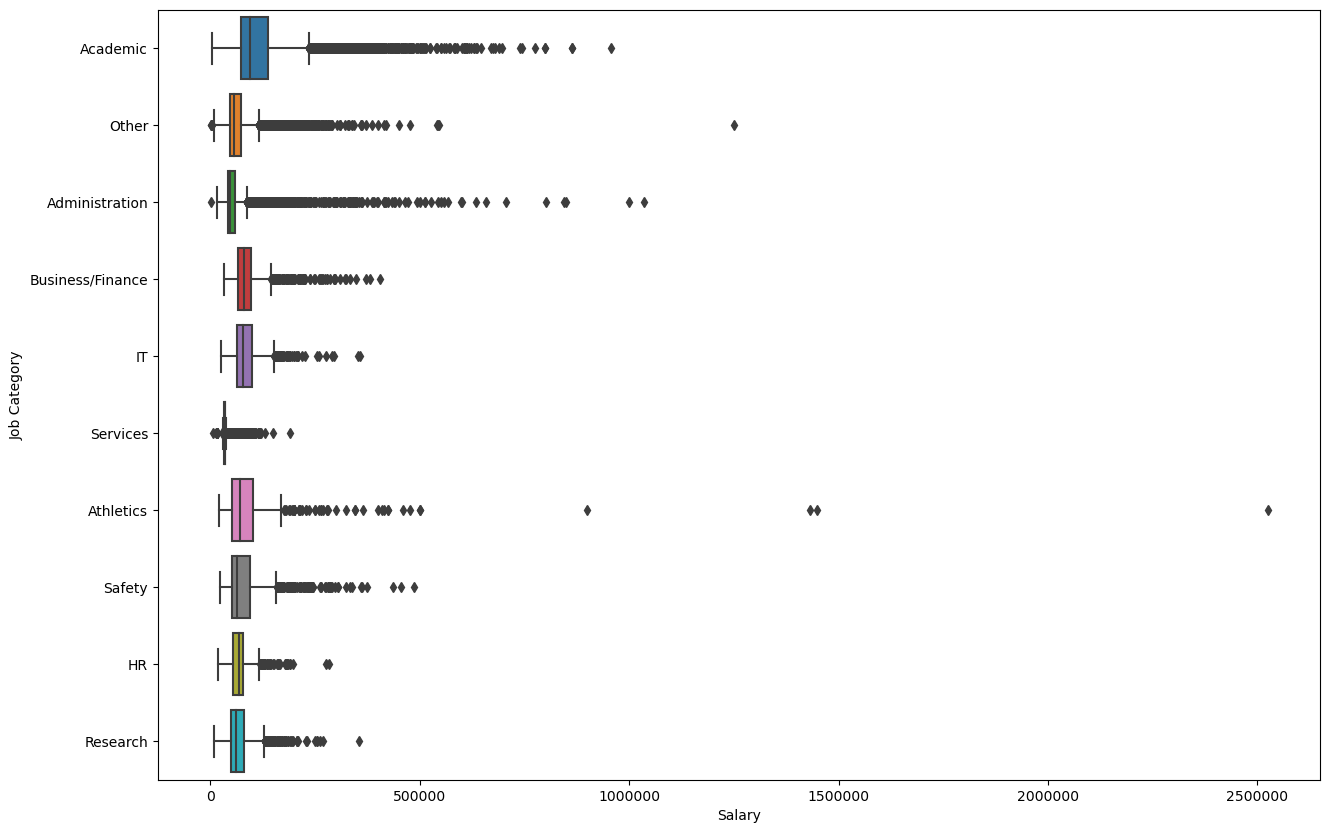

In [40]:
job_categories = {
    'Academic': ['Lecturer', 'Assistant Professor', 'Associate Professor','Professor','Visiting Professor',
                 'Faculty','Department Chair','Department Head','Instructor','Research Associate Professor'
                ,'Interim Chair'],
    'Administration': ['Administrator', 'Coordinator', 'Executive Assistance','Administrative', 
                       'Assistant','Admissions','Financial Aid','Registrar','Provost','Executive Assistant',
                      'Chancellor','Residence','Housing','Advisor','Career','Career Services'],
    'Athletics': ['Athletic','Athletics','Coach','Trainer'],
    'Business/Finance': ['Finance', 'Accounting','Accountant','Business','Operations','Analyst','Budget','Planning'],
    'HR': ['Human Resources', 'Recruiter','HR','Compensation','Human','Resources','Benefits','Payroll','Leave','Compliance'],
    'IT': ['IT', 'Information Technology', 'Computer', 'Network','Technology Support','Helpdesk',
          'Developer','Infrastructure','Database','Server'],
    'Research': ['Research', 'Research Operations', 'Grant','Postdoctoral','Lab','Laboratory','Research Associate'],
    'Safety': ['Safety','Police','Officer','Security','Guard'],
    'Services': ['Custodian','Janitor','Gardening','Landscaping','Landscape','Garden','Facilities'],
    'Other': ['Other']
}
categorized_cc = 0
def assign_category(job_title):
    for category, keywords in job_categories.items():
        for keyword in keywords:
            for word in job_title.lower().split(' '):
                if keyword.lower() == word:
                    return category
    return 'Other'

salaries['Job Category'] = salaries['Category'].apply(assign_category) 

plt.figure(figsize=(15,10))
sns.boxplot(x='Salary', y='Job Category', data=salaries)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

### Heatmap Overall

<AxesSubplot:>

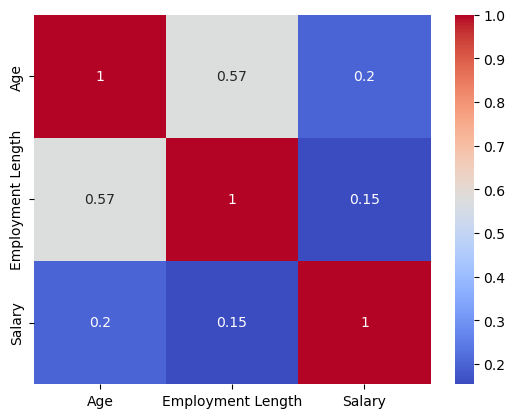

In [41]:
variables = ['Age', 'Employment Length','Job Category','Salary']

data = salaries[variables]

data = data.dropna()


corr_matrix = data.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True,)

### Heatmap By Job Category

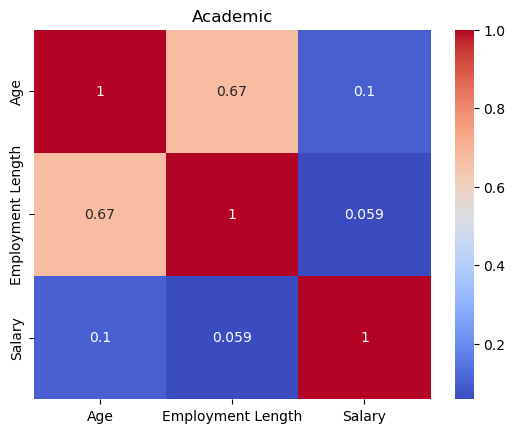

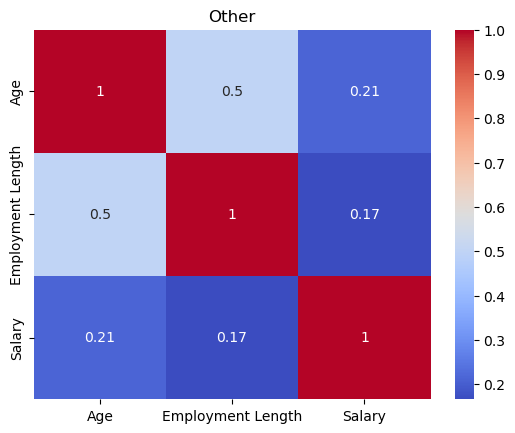

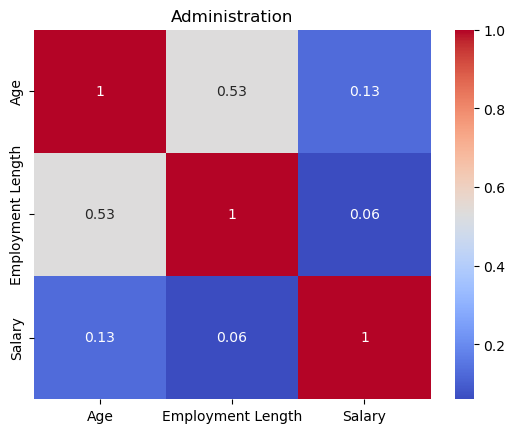

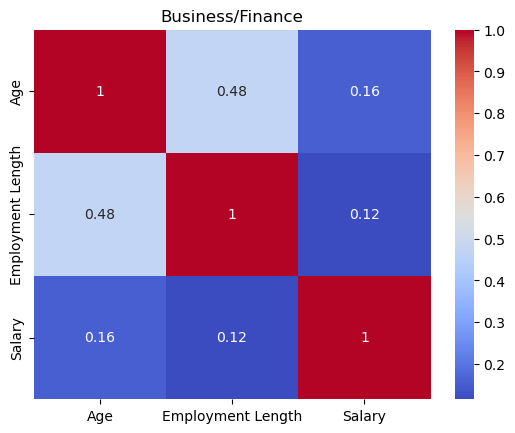

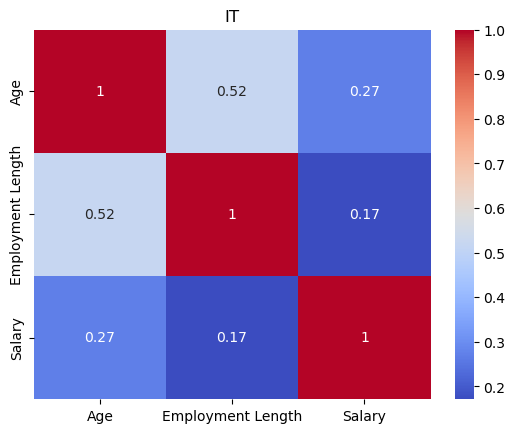

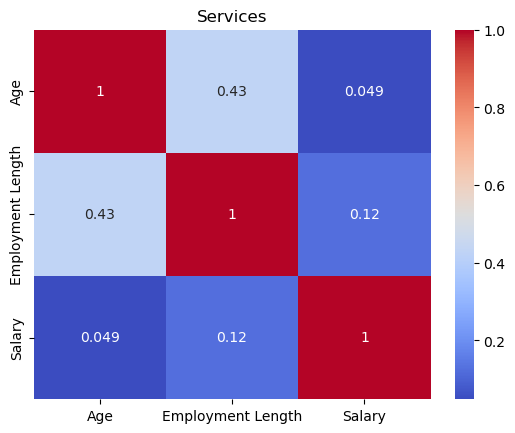

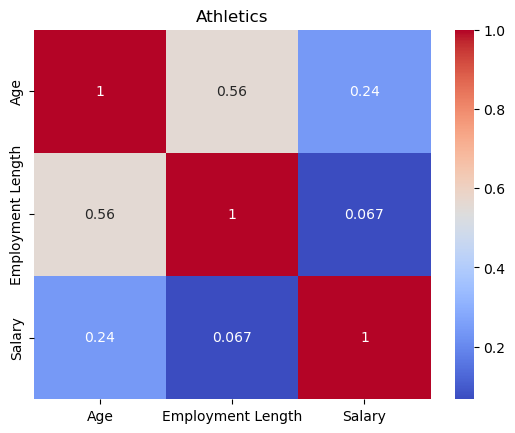

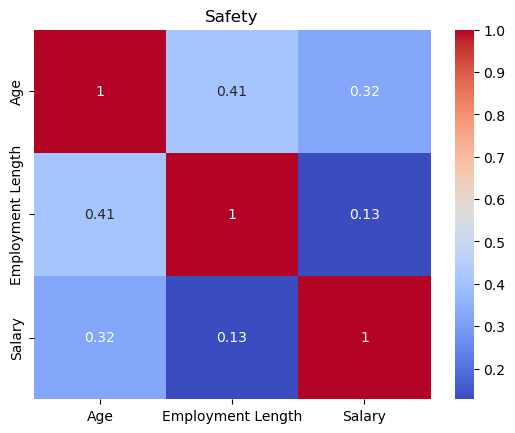

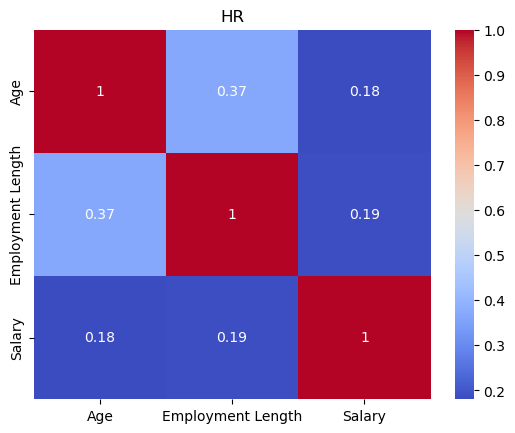

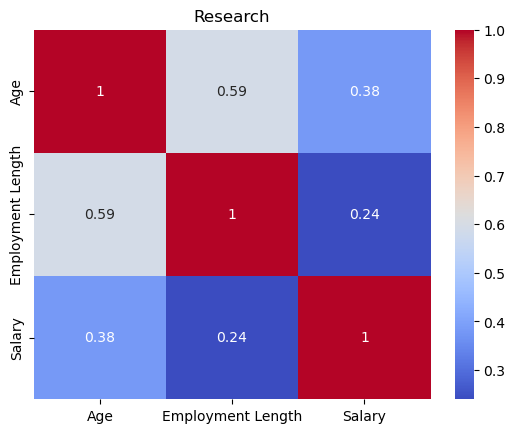

In [42]:
import seaborn as sns


variables = ['Age', 'Employment Length', 'Salary','Job Category']


data = salaries[variables].dropna()


for job_category in data['Job Category'].unique():
    job_data = data[data['Job Category'] == job_category]
    corr_matrix = job_data.corr()
    sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)
    plt.title(job_category)
    plt.show()